In [1]:
import calc
import icio
import postproc

import os
import random
import numpy as np
import torch

In [2]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = False  # type: ignore

seed_everything(79)

In [3]:
dir_path = '/opt/ml/project/codes/imagecluster/test_images'

In [4]:
images = icio.read_images(dir_path, size=(224,224))

/opt/ml/project/codes/imagecluster/test_images/20220525_060932.653-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061029.674-2.png/opt/ml/project/codes/imagecluster/test_images/20220525_060953.649-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061008.515-3.png/opt/ml/project/codes/imagecluster/test_images/20220525_060944.319-3.png/opt/ml/project/codes/imagecluster/test_images/20220525_061014.816-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061034.319-0.png


/opt/ml/project/codes/imagecluster/test_images/20220525_060944.319-1.png




/opt/ml/project/codes/imagecluster/test_images/20220525_061031.995-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061014.816-2.png/opt/ml/project/codes/imagecluster/test_images/20220525_061020.213-1.png/opt/ml/project/codes/imagecluster/test_images/20220525_061023.383-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061021.768-2.png



/opt/ml/project/codes/imagecluster/test_images/2022

In [5]:
model = calc.get_model()

In [6]:
fingerprints = calc.fingerprints(images, model)
for k, v in fingerprints.items():
    fingerprints[k] = v / np.linalg.norm(v) # normalize
print(fingerprints)

/opt/ml/project/codes/imagecluster/test_images/20220525_061034.319-0.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061053.184-2.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061030.458-0.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061015.611-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061021.768-0.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061029.674-2.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061020.213-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061053.184-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061013.222-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_060931.068-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061008.515-3.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061031.995-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_060944.319-0.png
/opt/ml/project/codes/imagecluster/test_images/2022

In [7]:
timestamps = icio.read_timestamps(dir_path)

In [24]:
clusters = calc.cluster(fingerprints, sim=0.05, min_csize=3) # 높일수록 엄격하게

#images : #clusters
3 : 4
4 : 1
5 : 1
6 : 1
7 : 1
8 : 1
9 : 1
10 : 1
15 : 1
25 : 1
#images in clusters total:  101


In [25]:
postproc.make_links(clusters, os.path.join(dir_path, 'imagecluster/clusters'))

cluster dir: /opt/ml/project/codes/imagecluster/test_images/imagecluster/clusters


plot array (uint8) size: 46.6552734375 MiB


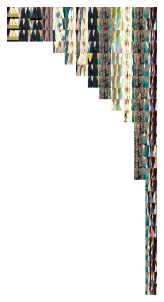

In [26]:
fig, ax = postproc.plot_clusters(clusters, images)
fig.savefig(os.path.join(dir_path, '_cluster.png'))
postproc.plt.show()

In [11]:
# import torchvision.models as models

# resnet18 = models.resnet18(pretrained=True)
# print(resnet18)